In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import json

def readfile(path):
    rows = []
    for line in open(path).readlines():
        row = json.loads(line)
        rows.append(row)
    df =  pd.DataFrame(rows)
    df = df.drop_duplicates(subset=['epoch'], keep='last')
    if 'fast' in path:
        df['test_acc1'] = df['test_acc']
        if 'imagenet21k' in path:
            df.epoch *= 10
    return df

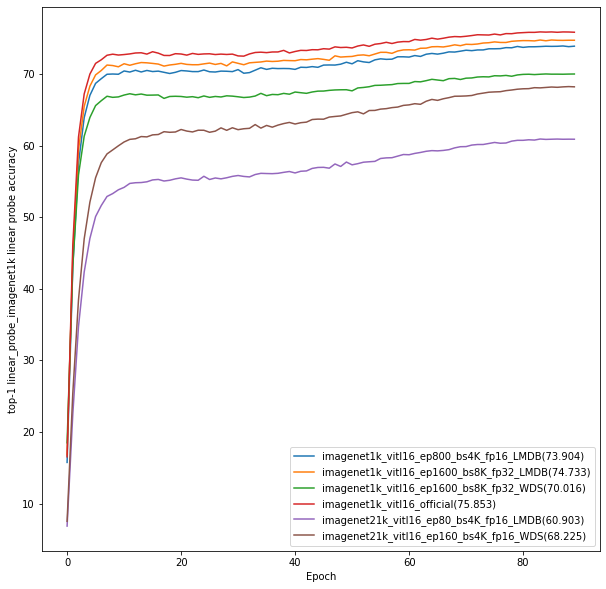

In [2]:
target = 'linear_probe_imagenet1k'
#target = 'fast_linear_probe_cifar10'

data = {
    "imagenet1k_vitl16_ep800_bs4K_fp16_LMDB": readfile(f"results/imagenet1k_08jan2022/{target}/log.txt"),
    "imagenet1k_vitl16_ep1600_bs8K_fp32_LMDB": readfile(f"results/imagenet1k_12jan2022/{target}/log.txt"),
    "imagenet1k_vitl16_ep1600_bs8K_fp32_WDS": readfile(f"results/imagenet1k_15jan2022/{target}/log.txt"),
    "imagenet1k_vitl16_official": readfile(f"results/imagenet1k_vitl16_official/{target}/log.txt"),
    "imagenet21k_vitl16_ep80_bs4K_fp16_LMDB": readfile(f"results/imagenet21k_12jan2022/{target}/log.txt"),
    "imagenet21k_vitl16_ep160_bs4K_fp16_WDS": readfile(f"results/imagenet21k_15jan2022/{target}/log.txt"),
}
fig = plt.figure(figsize=(10,10))
for exp, log in data.items():
    final = list(log["test_acc1"])[-1]
    plt.plot(log["test_acc1"], label=exp + f'({final:.3f})')
plt.xlabel("Epoch")
plt.ylabel(f"top-1 {target} linear probe accuracy")
plt.legend()